In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

In [3]:
x=np.arange(0,6, 0.1)
X, Y = np.meshgrid(x,x)
cyl_rad = 2
cyl_x = []
cyl_y = []
for theta in np.linspace(0, 2*np.pi,100):
    cyl_x.append(cyl_rad*np.sin(theta) + 3.5)
    cyl_y.append(cyl_rad*np.cos(theta) + 3.5)

#checking for points inside and ouside shape
x0, y0 = 3.5, 3.5
r = np.sqrt((X - x0)**2 + (Y - y0)**2)
outside = r > cyl_rad
inside = r <= cyl_rad

In [4]:
#calculating B-field (x&y components) both inside and oustide ;)
#B_out = vec(x,y)  
#B_in = B_0 * e^(-x/lambda_L)
#lambda_L = np.sqrt((eps*m*c**2)/(n_s))
#

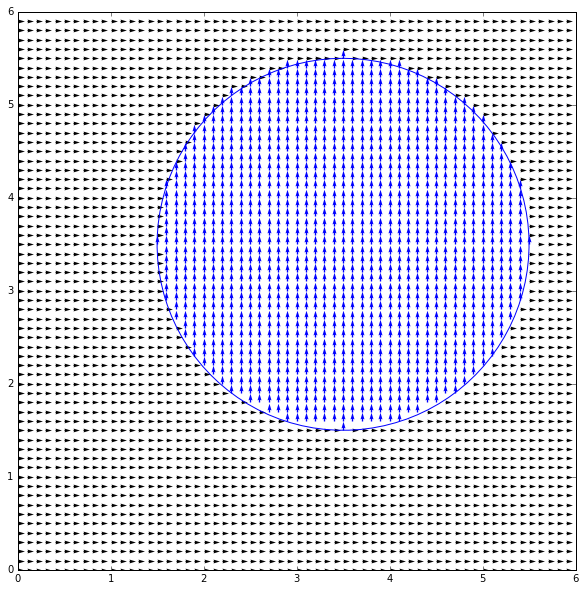

In [6]:
#printing the vector field & shape, looking down on a cylinder
plt.figure(1,figsize=(10,10))
plt.quiver(X[outside],Y[outside],1,0)
plt.quiver(X[inside], Y[inside], 0,1, color = 'blue')
plt.plot(cyl_x, cyl_y, color = 'blue')